In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# Define the Auto-Encoder Architecture
class AutoEncoder(nn.Module):
  def __init__(self):
    super (AutoEncoder, self).__init__()
    # Encoder
    self.encoder= nn. Sequential(
    nn. Linear (28* 28, 128),
    nn.ReLU(),
    nn. Linear (128, 64),
    nn.ReLU(),
    nn. Linear (64, 32)
    )
    # Decoder
    self.decoder= nn. Sequential (
    nn. Linear (32, 64),
    nn.ReLU(),
    nn. Linear (64, 128),
    nn.ReLU(),
    nn. Linear (128, 28 * 28),
    nn.Sigmoid()
    )
  def forward(self, x):
    x = self.encoder (x)
    x = self.decoder(x)
    return x

# Data Preparation
transform = transforms.Compose ([transforms. ToTensor(), transforms. Lambda (lambda x: x.view(-1))])
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader =torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
# Initialize Model, Loss, and Optimizer
model= AutoEncoder()
criterion= nn.MSELoss()
optimizer =optim.Adam(model.parameters(), lr=0.001)
# Training the Auto-Encoder


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.53MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
epochs = 10
for epoch in range(epochs):
  total_loss = 0
  for data, _ in train_loader:
    optimizer.zero_grad()
    output= model(data)
    loss = criterion (output, data)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader)}')

Epoch [1/10], Loss: 0.04792657053308574
Epoch [2/10], Loss: 0.02458372885293798
Epoch [3/10], Loss: 0.019631053848283442
Epoch [4/10], Loss: 0.016829567472897232
Epoch [5/10], Loss: 0.014720137983655878
Epoch [6/10], Loss: 0.013179908979183702
Epoch [7/10], Loss: 0.012080195801717831
Epoch [8/10], Loss: 0.011317444264269205
Epoch [9/10], Loss: 0.01080516003755364
Epoch [10/10], Loss: 0.010361206440775315


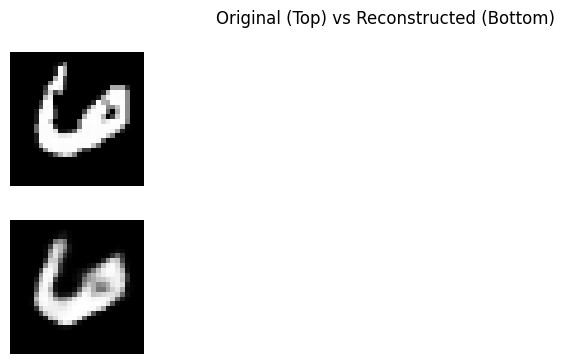

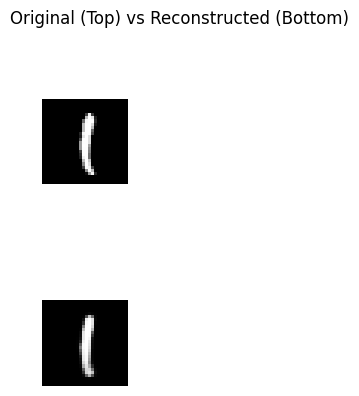

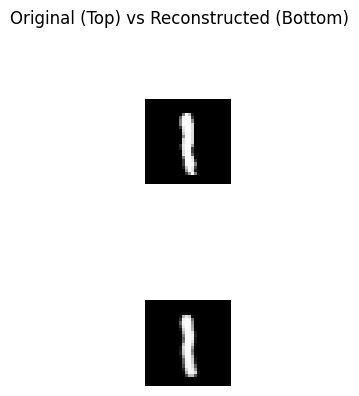

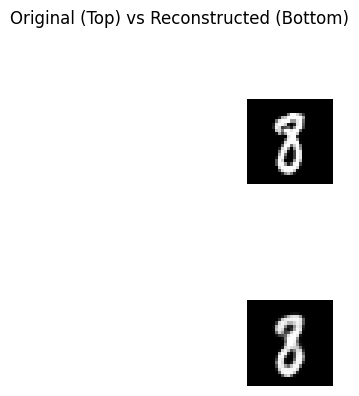

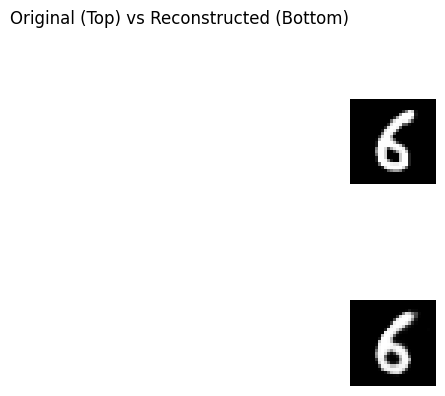

In [ ]:
# Select a few samples from the test set for visualization
# Visualize Reconstruction Results
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader =torch.utils.data. DataLoader(test_data, batch_size=5, shuffle=True)
#Get a batch and visualize
data,_ = next(iter(test_loader))
reconstructed =model(data)
# Plot original vs reconstructed images
plt.figure(figsize=(10, 4))
for i in range(5):
  # Original
  plt.subplot(2, 5, i + 1)
  plt.imshow(data[i].view (28, 28).detach().numpy(), cmap='gray')
  plt.axis('off')
  # Reconstructed
  plt.subplot(2, 5, i + 6)
  plt.imshow(reconstructed [i].view (28, 28).detach().numpy(), cmap='gray')
  plt.axis('off')
  plt.suptitle("Original (Top) vs Reconstructed (Bottom)")
  plt.show()

Epoch 1, Loss: 0.0145
Epoch 2, Loss: 0.0134
Epoch 3, Loss: 0.0130
Epoch 4, Loss: 0.0128
Epoch 5, Loss: 0.0125
Epoch 6, Loss: 0.0124
Epoch 7, Loss: 0.0122
Epoch 8, Loss: 0.0120
Epoch 9, Loss: 0.0118
Epoch 10, Loss: 0.0117


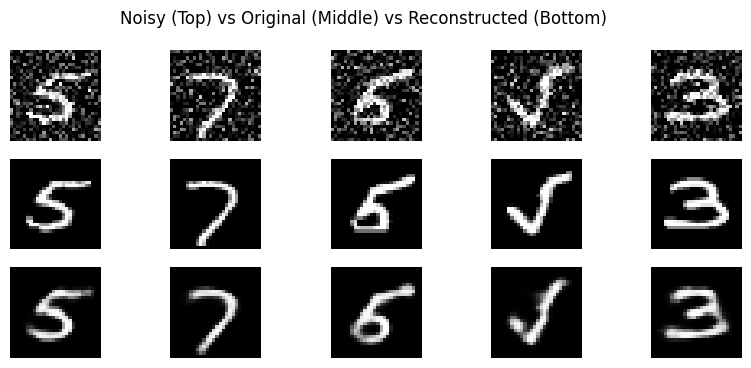

In [ ]:
# Add noise to the images
#Denoising Auto-Encoder (DAE)
def add_noise(img, noise_factor=0.3):
  noisy_img = img + noise_factor * torch.randn(*img.shape)
  return torch.clip(noisy_img, 0., 1.)
#Modify the training loop for Denoising Auto-Encoder
epochs = 10
for epoch in range(epochs):
  total_loss = 0
  for data,_ in train_loader:
    noisy_data = add_noise(data) # Add noise
    optimizer.zero_grad()
    output =model(noisy_data) # Train on noisy data
    loss =criterion(output, data) # Compare with original data
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print (f'Epoch {epoch+1}, Loss: {(total_loss / len(train_loader)):.4f}')
# Visualize the reconstruction on noisy images
noisy_data = add_noise(data)
reconstructed= model(noisy_data)

plt.figure(figsize=(10, 4))
for i in range(5):
  # Noisy
  plt.subplot(3, 5, i + 1)
  plt.imshow(noisy_data[i].view (28, 28).detach().numpy(), cmap='gray')
  plt.axis('off')
  # Original
  plt.subplot(3, 5, i + 6)
  plt.imshow(data[i].view (28, 28).detach().numpy(), cmap='gray')
  plt.axis('off')
  # Reconstructed
  plt.subplot(3, 5, i+11)
  plt.imshow(reconstructed[i].view (28, 28).detach().numpy(), cmap='gray')
  plt.axis('off')
plt.suptitle("Noisy (Top) vs Original (Middle) vs Reconstructed (Bottom)")
plt.show()

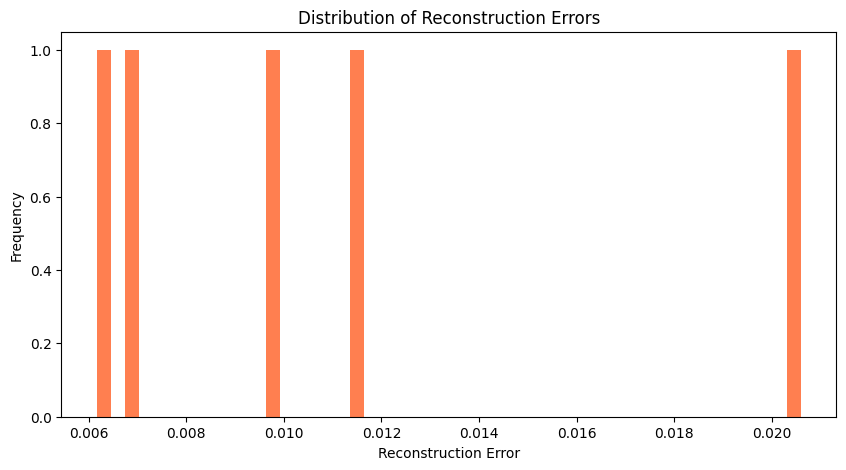

Detected 1 anomalies out of 5 samples.


In [ ]:
#Anomaly Detection with Auto-Encoders
import numpy as np
# Calculate reconstruction error
def reconstruction_error(data, reconstructed):
  return np.mean((data- reconstructed) ** 2, axis=1)
# Visualize reconstruction error distribution
data,_ = next(iter(test_loader))
reconstructed= model (data)
errors = reconstruction_error(data.detach().numpy(), reconstructed.detach().numpy())
# Histogram of reconstruction errors
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=50, color='coral')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.show()
# Set a threshold for anomaly detection (e.g., top 5% errors)
threshold = np.percentile (errors, 95)
anomalies= errors > threshold
print(f"Detected {(anomalies.sum())} anomalies out of {(len(errors))} samples.")